<a href="https://colab.research.google.com/github/priyeshroy10155/ML-Projects/blob/main/titenik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/titanic.csv")

In [ ]:
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [ ]:
df.head(10)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


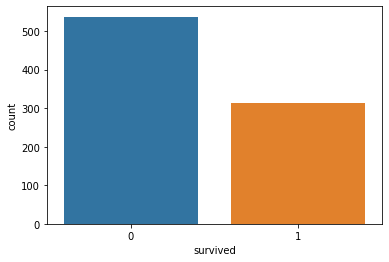

In [ ]:
sns.countplot(x="survived",data=df)

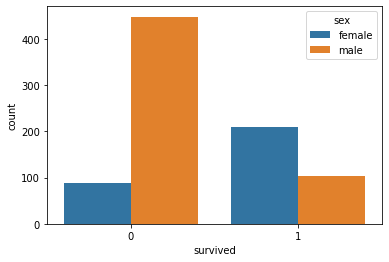

In [ ]:
sns.countplot(x="survived",hue="sex",data=df)

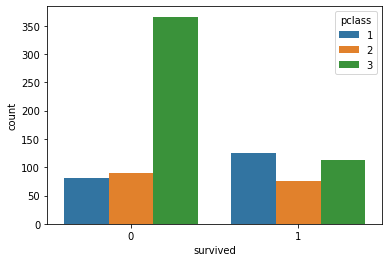

In [ ]:
sns.countplot(x="survived",hue="pclass",data=df)

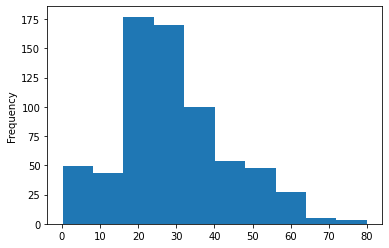

In [ ]:
df["age"].plot.hist()

AttributeError: ignored

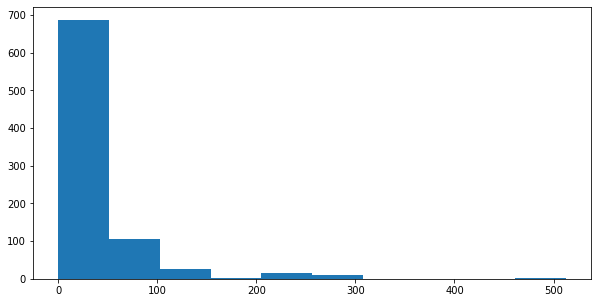

In [ ]:
df["fare"].plot.hist(bin=20, figsize=(10,5))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


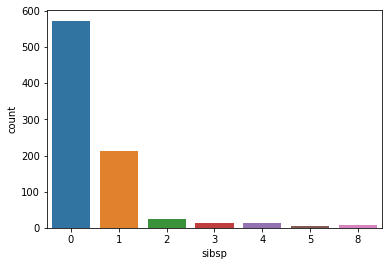

In [ ]:
sns.countplot(x="sibsp",data=df)

##Data Wrangling

In [ ]:
 df.isnull()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
846,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
847,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
848,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False


In [ ]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

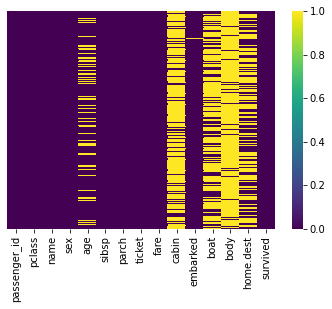

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

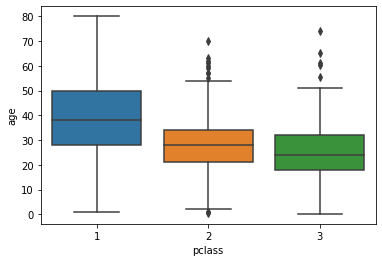

In [ ]:
sns.boxplot(x="pclass",y="age",data=df)

In [ ]:
df1=df.head(10)

In [ ]:
df1

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


In [ ]:
df1.drop("cabin",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,S,NaN,NaN,NaN,0


In [ ]:
df1.drop("boat",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.drop("body",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,S,NaN,0


In [ ]:
df1.drop("home.dest",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,S,0


In [ ]:
df1.dropna()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,S,0


In [ ]:
pd.get_dummies(df1["sex"])

,female,male
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [ ]:
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


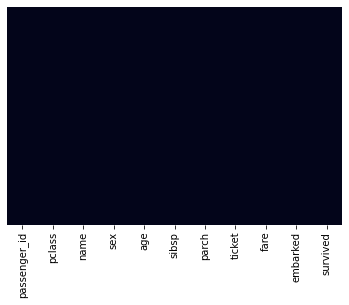

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [ ]:
df1.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

In [ ]:
df1

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,S,0


In [ ]:
sex=pd.get_dummies(df1["sex"],drop_first=True)

In [ ]:
sex

,male
1,1
2,0
3,0
4,1
5,1
6,1
7,0
8,0
9,0


In [ ]:
embark=pd.get_dummies(df1["embarked"])
embark.head(8)

,S
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1


In [ ]:
pcl=pd.get_dummies(df1["pclass"])
pcl.head(8)

,2,3
1,0,1
2,0,1
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1


In [ ]:
 df1=pd.concat([df1,sex,embark,pcl],axis=1)

In [ ]:
df1.head(8)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,male,S,2,3
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,S,0,1,1,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S,0,0,1,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,S,1,0,1,1,0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,S,0,1,1,1,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,S,0,1,1,0,1
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,0,1,1,0,1
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,S,1,0,1,1,0
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,S,1,0,1,0,1


In [ ]:
df1.drop(["passenger_id","name","sex","ticket","embarked"],axis=1,inplace=True)

KeyError: ignored

In [ ]:
df1

,pclass,age,sibsp,parch,fare,survived,male,S,2,3
1,3,38.0,0,0,8.6625,0,1,1,0,1
2,3,30.0,1,1,24.1500,0,0,1,0,1
3,2,54.0,1,3,23.0000,1,0,1,1,0
4,2,40.0,0,0,13.0000,0,1,1,1,0
5,3,28.0,0,0,22.5250,0,1,1,0,1
6,3,19.0,0,0,0.0000,0,1,1,0,1
7,2,30.0,0,0,13.0000,1,0,1,1,0
8,3,22.0,0,0,7.7750,1,0,1,0,1
9,3,21.0,1,0,9.8250,0,0,1,0,1


In [ ]:
df1.drop("ticket",axis=1,inplace=True)

KeyError: ignored

In [ ]:
df1

,pclass,age,sibsp,parch,fare,survived,male,S,2,3
1,3,38.0,0,0,8.6625,0,1,1,0,1
2,3,30.0,1,1,24.1500,0,0,1,0,1
3,2,54.0,1,3,23.0000,1,0,1,1,0
4,2,40.0,0,0,13.0000,0,1,1,1,0
5,3,28.0,0,0,22.5250,0,1,1,0,1
6,3,19.0,0,0,0.0000,0,1,1,0,1
7,2,30.0,0,0,13.0000,1,0,1,1,0
8,3,22.0,0,0,7.7750,1,0,1,0,1
9,3,21.0,1,0,9.8250,0,0,1,0,1


In [ ]:
df1.drop("pclass",axis=1,inplace=True)

In [ ]:
df1

,age,sibsp,parch,fare,survived,male,S,2,3
1,38.0,0,0,8.6625,0,1,1,0,1
2,30.0,1,1,24.1500,0,0,1,0,1
3,54.0,1,3,23.0000,1,0,1,1,0
4,40.0,0,0,13.0000,0,1,1,1,0
5,28.0,0,0,22.5250,0,1,1,0,1
6,19.0,0,0,0.0000,0,1,1,0,1
7,30.0,0,0,13.0000,1,0,1,1,0
8,22.0,0,0,7.7750,1,0,1,0,1
9,21.0,1,0,9.8250,0,0,1,0,1


In [ ]:
##Train Data

In [ ]:
x=df1.drop("survived",axis=1)
y=df1["survived"]

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import sklearn

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()

In [ ]:
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [ ]:
prediction = logmodel.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.33      1.00      0.50         1\n           1       0.00      0.00      0.00         2\n\n    accuracy                           0.33         3\n   macro avg       0.17      0.50      0.25         3\nweighted avg       0.11      0.33      0.17         3\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,prediction)

array([[1, 0],
       [2, 0]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prediction)

0.3333333333333333